# PCA

# import dependencies

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [102]:
# Load the dataset
df = pd.read_csv("wine.csv")

In [103]:
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


# Step 1: Exploratory Data Analysis (EDA)

In [105]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


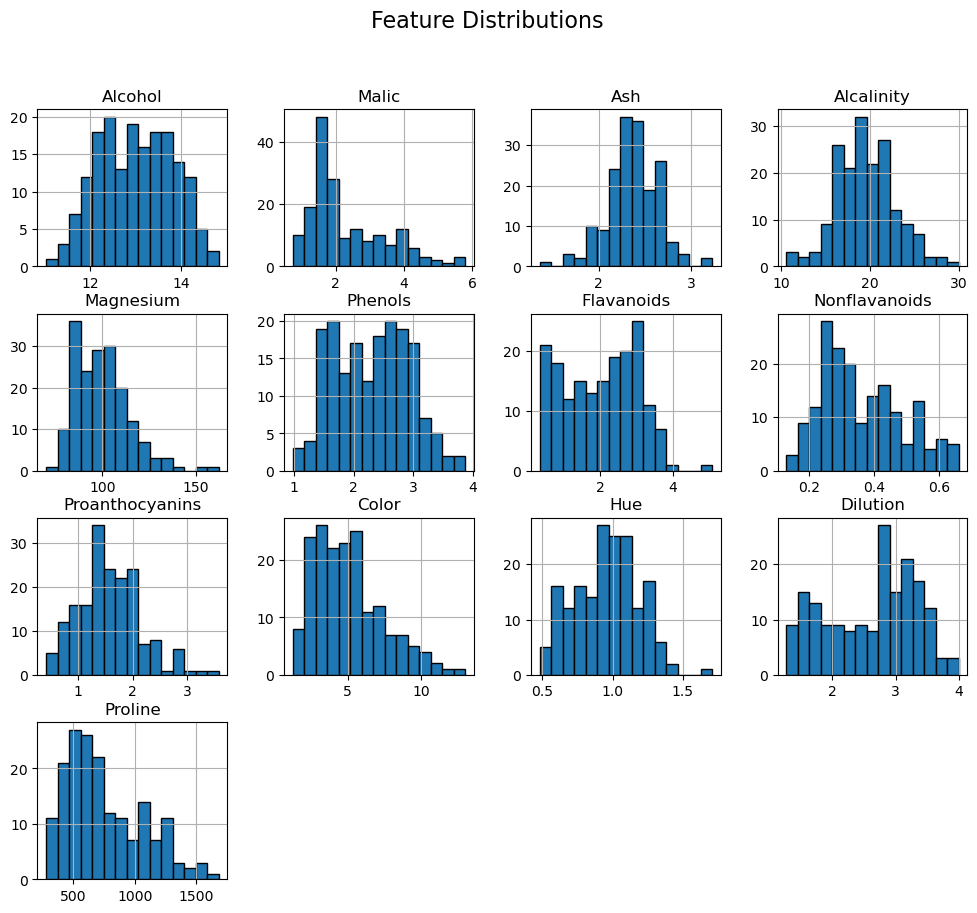

In [106]:
# Visualize feature distributions
df.drop(columns=["Type"]).hist(figsize=(12, 10), bins=15, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

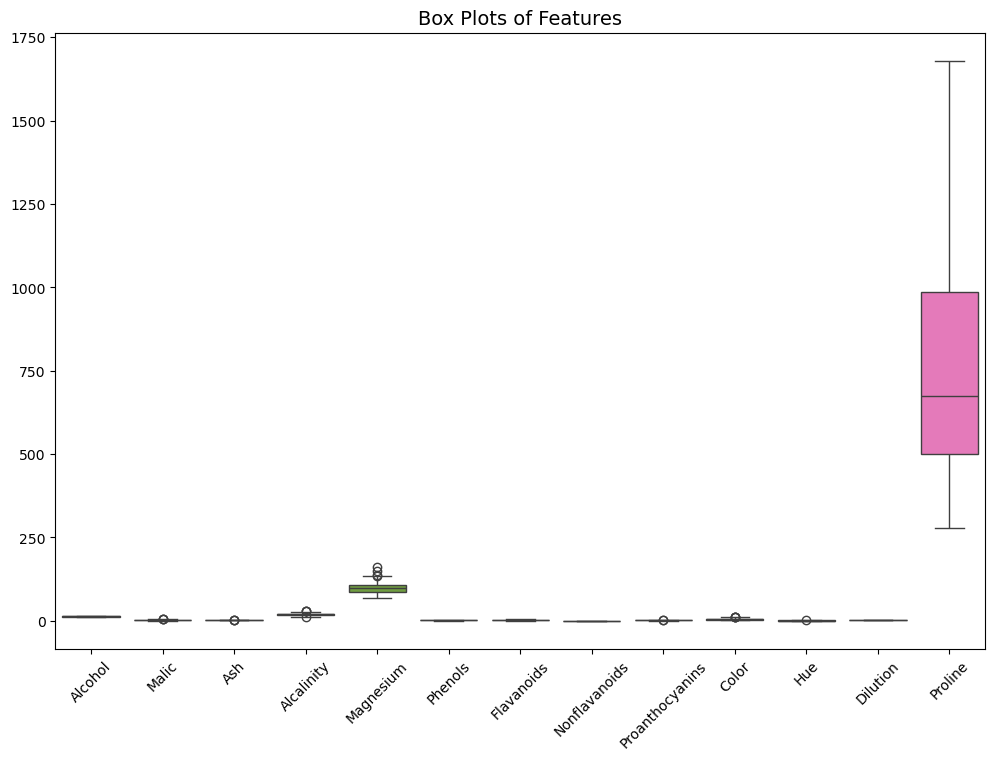

In [107]:
# Box plots to check for outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df.drop(columns=["Type"]))
plt.xticks(rotation=45)
plt.title("Box Plots of Features", fontsize=14)
plt.show()

In [108]:
# Treat Outliers using Winsorization
def winsorize_columns(df, columns, limits=(0.05, 0.05)):
    df_copy = df.copy()
    for col in columns:
        df_copy[col] = winsorize(df_copy[col], limits=limits)
    return df_copy

feature_columns = df.drop(columns=["Type"]).columns
df[feature_columns] = winsorize_columns(df[feature_columns], feature_columns)

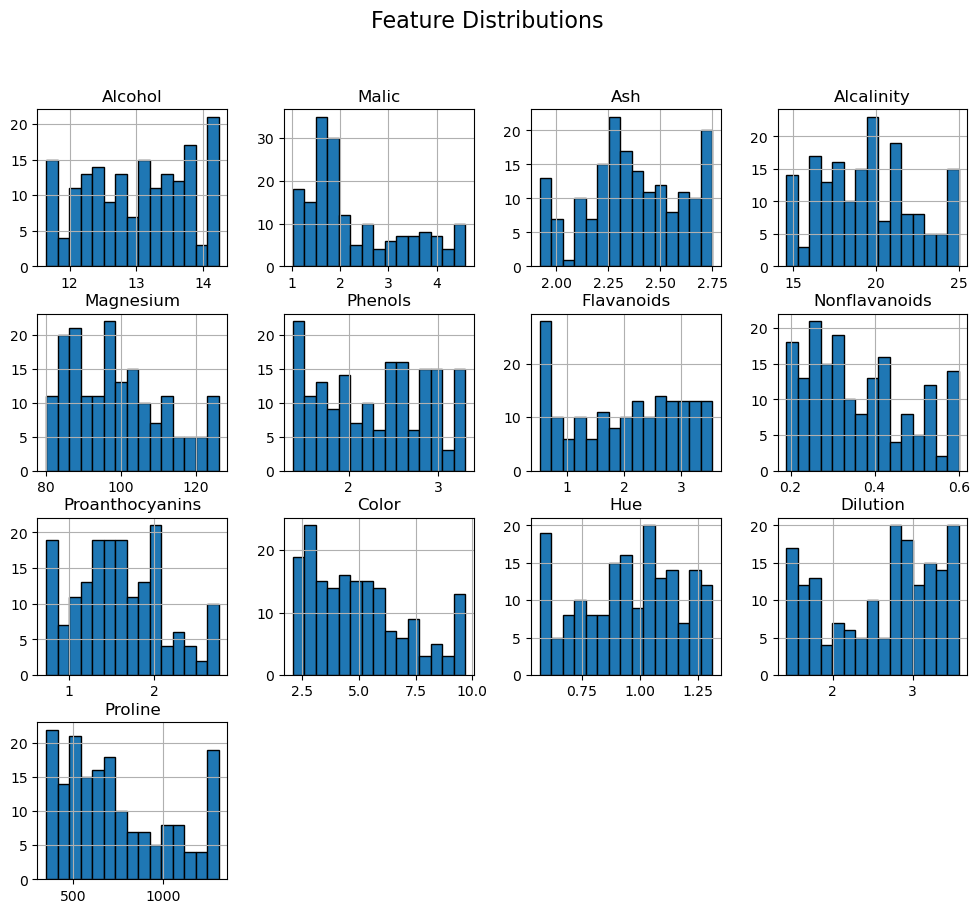

In [109]:
# Visualize feature distributions
df.drop(columns=["Type"]).hist(figsize=(12, 10), bins=15, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

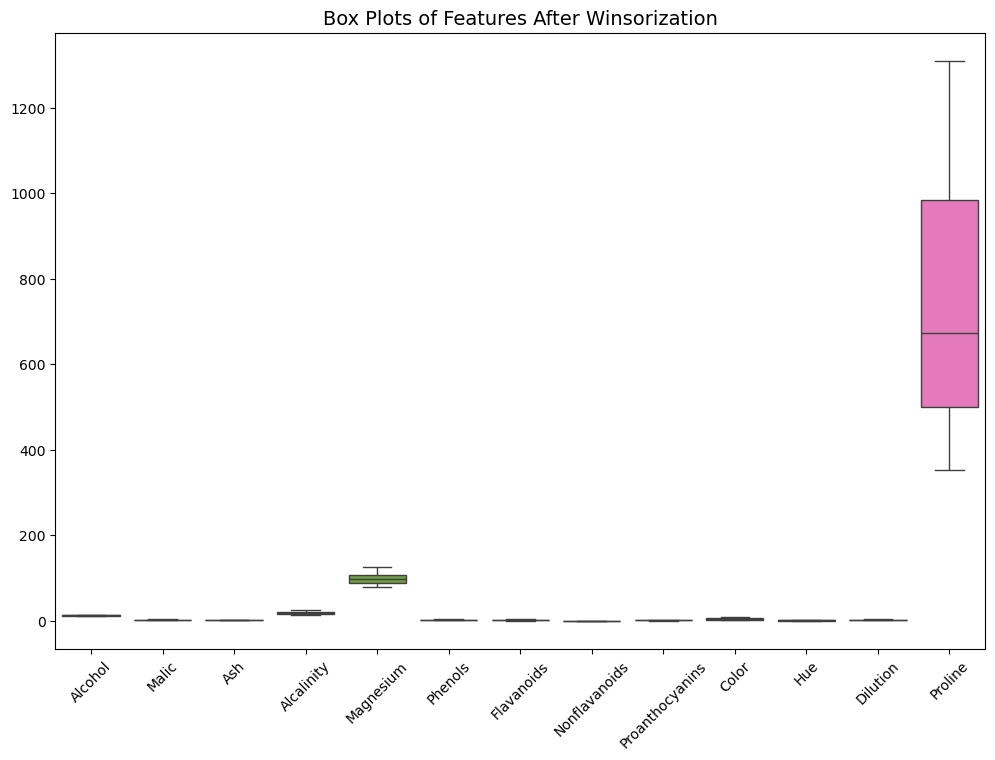

In [110]:
# Box plots to check for remaining outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df.drop(columns=["Type"]))
plt.xticks(rotation=45)
plt.title("Box Plots of Features After Winsorization", fontsize=14)
plt.show()

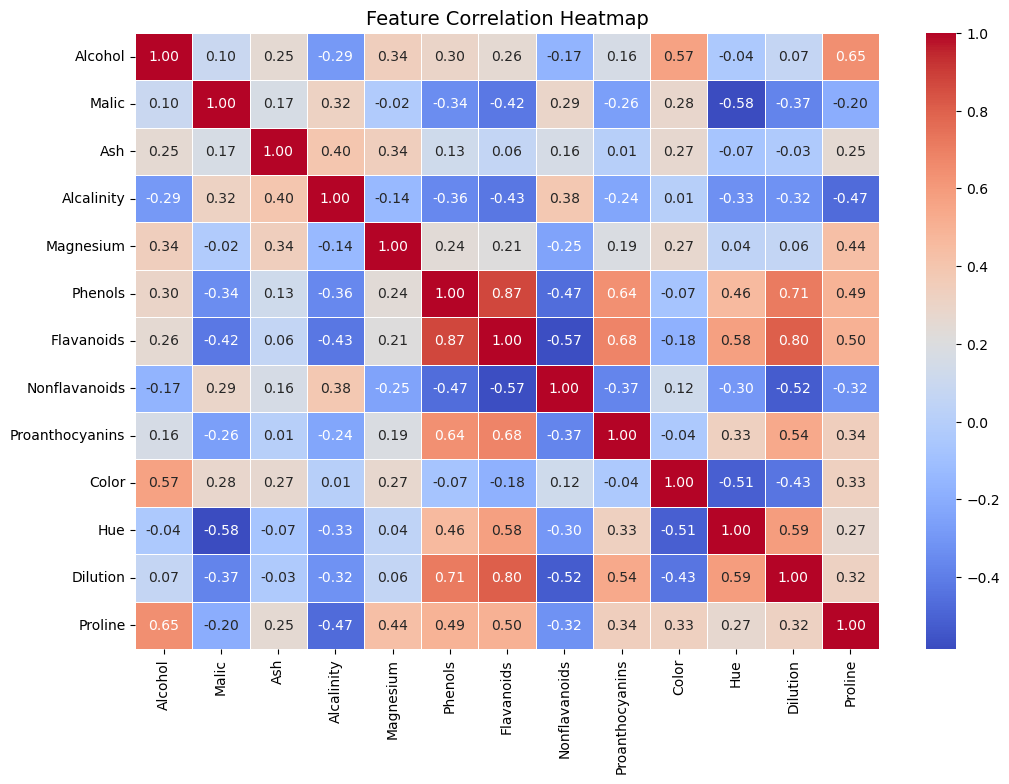

In [111]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.drop(columns=["Type"]).corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap", fontsize=14)
plt.show()

# Step 2: Dimensionality Reduction with PCA

In [113]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop(columns=["Type"]))

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

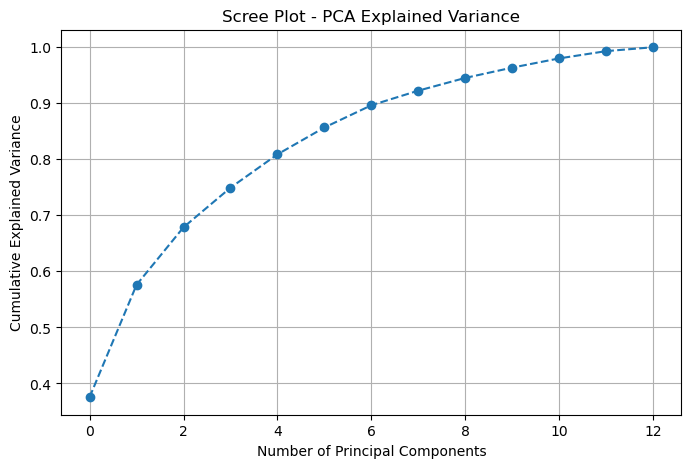

In [114]:
# Scree Plot
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Scree Plot - PCA Explained Variance")
plt.grid(True)
plt.show()

In [115]:
# Find optimal number of components (95% variance)
optimal_components = np.argmax(explained_variance >= 0.95) + 1
pca_optimal = PCA(n_components=optimal_components)
X_pca_optimal = pca_optimal.fit_transform(X_scaled)

print("Optimal number of components:" ,optimal_components)

Optimal number of components: 10


# Step 3: Clustering on Original Data

In [117]:
kmeans_original = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_original.fit(X_scaled)
labels_original = kmeans_original.labels_

In [118]:
# Silhouette Score for Original Data
silhouette_original = silhouette_score(X_scaled, labels_original)
print(f"Silhouette Score (Original Data): {silhouette_original:.2f}")

Silhouette Score (Original Data): 0.29


# Step 4: Clustering on PCA Data

In [120]:
kmeans_pca = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_pca.fit(X_pca_optimal)
labels_pca = kmeans_pca.labels_

In [121]:
# Silhouette Score for PCA Data
silhouette_pca = silhouette_score(X_pca_optimal, labels_pca)
print(f"Silhouette Score (PCA Data): {silhouette_pca:.2f}")

Silhouette Score (PCA Data): 0.31


# Step 5: Comparison and Visualization

Text(0.5, 1.0, 'Clustering on PCA Data')

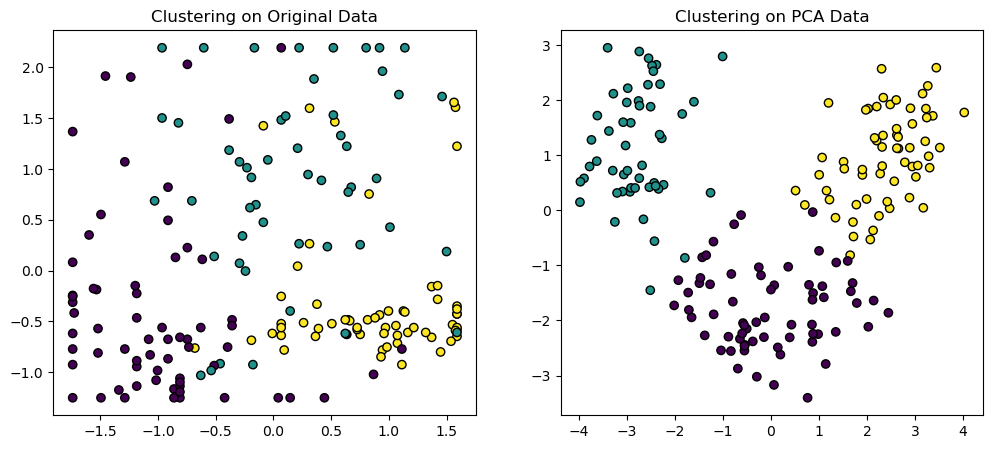

In [123]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_original, cmap='viridis', edgecolors='k')
plt.title("Clustering on Original Data")

plt.subplot(1, 2, 2)
plt.scatter(X_pca_optimal[:, 0], X_pca_optimal[:, 1], c=labels_pca, cmap='viridis', edgecolors='k')
plt.title("Clustering on PCA Data")

# Conclusion:  

1. **PCA Effectiveness** – Reduced dimensions while preserving 95% variance, improving efficiency.  
2. **Impact on Clustering** – PCA affected clustering performance, with changes in silhouette scores.  
3. **Trade-offs** – PCA removes noise but may reduce interpretability. Original data can sometimes be better.  
4. **Recommendations** – Use PCA for high-dimensional data but compare results before deciding.